# Boundary value problems (BVPs) in 2D - Elliptic equation
<br />

> _Thus the partial differential equation entered theoretical physics as a handmaid, but has gradually become mistress._ - Albert Einstein

## Motivation

Imagine we have a square plate of side length $L$ made of a thermally conductive material. We fix the temperature at each side of the plate as shown in the following figure


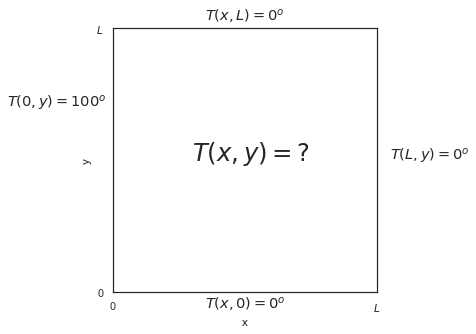

After some time, we aim to find the distribution of temperatures within the plate. We know that, in steady state, the temperature $T(x,y)$ satisfies the _partial differential equation_ (PDE)

$$
\frac{\partial^2 T(x,y)}{\partial x^2}+\frac{\partial^2 T(x,y)}{\partial y^2}=0.
$$

Then, we have to find $T(x,y)$ subject to the conditions $T(x,0)=T(L,x)=T(L,y)=0$ and $T(0,y)=100$. How can we do this?


## Mathematical formulation
         
In general, we want to find a function $u(x,y)$ defined in a domain $\Omega$ satisfying

\begin{equation}
\frac{\partial^2 u(x,y)}{\partial x^2}+\frac{\partial^2 u(x,y)}{\partial y^2}=f(x,y),\label{eq_poi}
\end{equation}

as well as the boundary conditions (BCs) $u(x,y)=g_i(x,y)$ for $(x,y)\in \partial \Omega_i$, with $\partial \Omega=\cup_i \partial \Omega_i$ being the boundary of $\Omega$ (see figure below).


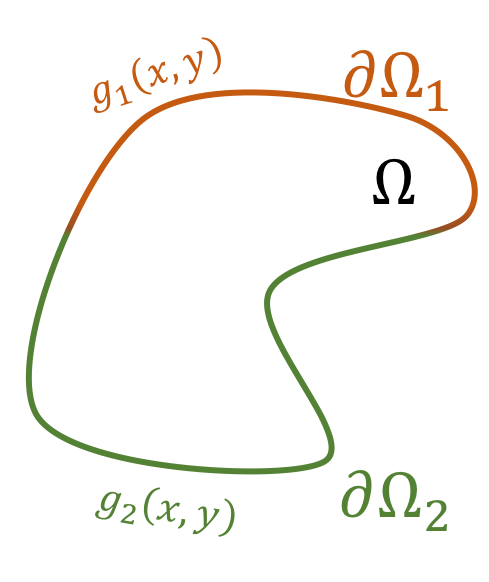

Moreover, we assume that the functions $f(x,y)$ and $g_i(x,y)$ are provided. This equation is known as _Poisson equation_ , which is reduced to the _Laplace equation_ when $f(x,y)=0$ in $\Omega$. Poisson equation arises in plenty steady state phenomena, such as diffusion, electrostatics, gravitation, and quantum mechanics. From now on, we will use any of the following notation when referring to it:

$$
\frac{\partial^2 u(x,y)}{\partial x^2}+\frac{\partial^2 u(x,y)}{\partial y^2}=u_{xx}(x,y)+u_{yy}(x,y)=\nabla^2 u(x,y)=\Delta u(x,y)=f(x,y).
$$

Finding the analytical solution to this problem is a non-trivial task, and is generally impossible for an arbitrary domain $\Omega$. For this reason, we aim to utilise numerical methods to find an approximation $u_{i,j}$ to the solution $u(x_i,y_j)$ on a finite set of points $(x_i,y_j)\in\Omega$, i.e., $u_{i,j}\approx u(x_i,y_j)$. To do so, we will employ the finite difference method (FDM).

## Finite Difference Method

We will follow the same procedure as done for the 1D case, i.e., replacing the differentials with numerical approximations. We will utilise $O(h^2)$ formulas for the second differentials in each direction:

\begin{align*}
&\frac{\partial^2 u}{\partial x^2}(x_i,y_j)=\frac{u_{i+1,j}-2u_{i,j}+u_{i-1,j}}{h_x^2}+O(h_x^2),\\
&\frac{\partial^2 u}{\partial y^2}(x_i,y_j)=\frac{u_{i,j+1}-2u_{i,j}+u_{i,j-1}}{h_y^2}+O(h_y^2),
\end{align*}

where $h_x$ and $h_y$ are the discretisation steps in the $x$ and $y$ directions, respectively. This leads us to the $O(h_x^2+h_y^2)$ _discretised Poisson equation_

\begin{equation}
\frac{u_{i+1,j}-2u_{i,j}+u_{i-1,j}}{h_x^2}+\frac{u_{i,j+1}-2u_{i,j}+u_{i,j-1}}{h_y^2}=f(x_i,y_j).\label{disc}
\end{equation}

This equation is valid at every point $(x_i,y_j)\in\Omega$, including the boundary. However, since we are given the value of the solution at the boundary (by now), it is not a problem (yet). To facilitate the application of the _discretised Poisson equation_ , we can find the 2D stencil, as shown below for a general case.   


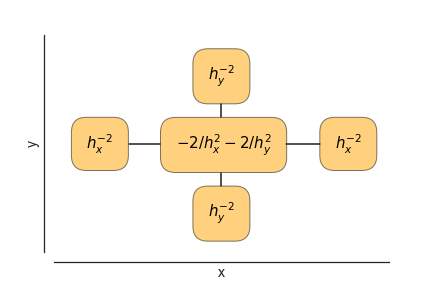

**Example.** We want to solve the Laplace equation from the motivation. Since we will do this manually (at first), we will consider only four points, and consequently $h_x=h_y=h=L/3$,

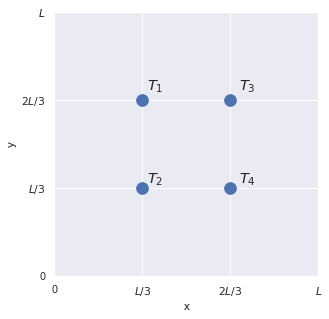

Note that, for convenience, we renamed the nodes using one number rather than two. This will prove to be very useful later.

Looking at the discretised Poisson equation in detail, we can see that, since $f(x,y)=0$ and $h_x=h_y=h$ in this case, we can multiply both sides by $h^2$ and get rid of it! This results in a simplified stencil,

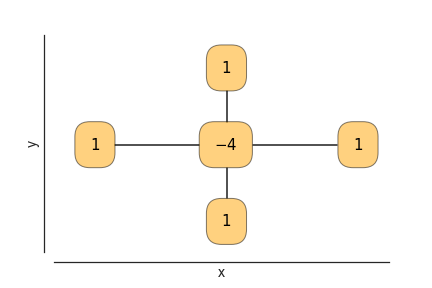

Utilising the stencil on each node, we get

\begin{align*}
&-4T_1+T_2+T_3+100=0,\\
&-4T_2+T_1+T_4+100=0,\\
&-4T_3+T_1+T_4=0,\\
&-4T_4+T_2+T_3=0,
\end{align*}

or, in matrix form

\begin{align*}
\begin{bmatrix}
-4 & 1 & 1&0\\
1 & -4 & 0&1\\
1 & 0 & -4&1\\
0 & 1 & 1&-4
\end{bmatrix}\begin{bmatrix}
T_1\\T_2\\T_3\\T_4
\end{bmatrix}=\begin{bmatrix}
-100\\-100\\0\\0
\end{bmatrix}.
\end{align*}

Solving the system, we obtain $T_1=T_2=37.5^o C$ and $T_3=T_4=12.5^o C$.

---

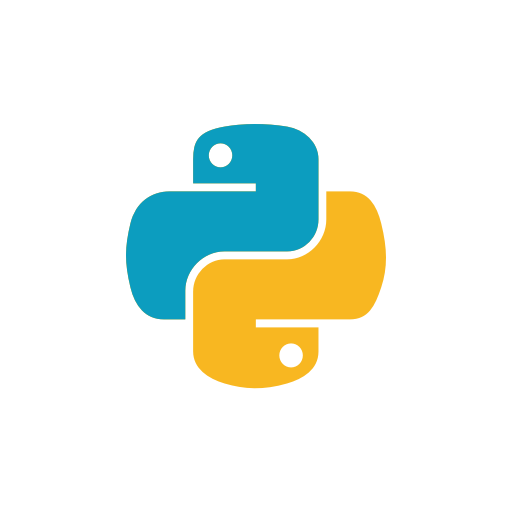

In this particular case, since we are working in a square, the implementation in Python results simpler than usual.  As before, we need to define a function for computing the matrix $\mathbf{A}$ and another for the vector $\mathbf{b}$. We assume as input an image $I$ full of zeros but on the boundaries, where the BCs are already implemented. This array is where we will store the solution to the 2D problem, and has the discretisation in itself.

To compute $\mathbf{A}$, we use the fact that the only non-zero values appear on the main five diagonals. The main diagonal has $-4$ on every element. The second diagonals (both on the left and right sides) are full of ones but at points neighbouring the upper and lower boundaries, where the BCs are imposed. Finally, the third diagonal is full of ones (no buts). This results in:  

In [1]:
def matrix_A_d(Im):
    sx, sy = np.shape(Im[1:-1,1:-1]) # size of the interior domain
    n = sx * sy # number of unknowns
    d0 = -4 * np.ones(n)
    d1 = np.ones(n-1); d1[sx-1::sx] = 0
    d2 = np.ones(n-sx)
    A = sps.diags([d0,d1,d1,d2,d2], [0,1,-1,sx,-sx], format='csr')
    return A

def vector_b_d(Im):
    sx, sy = np.shape(Im[1:-1,1:-1]) # size of the interior domain
    b = np.zeros(sx * sy)
    b[0:sx] = -Im[1:-1,0] # left boundary
    b[-sx::] = -Im[1:-1,-1] # right boundary
    b[0::sx] = b[0::sx] - Im[0,1:-1] # top boundary
    b[sx-1::sx] = b[sx-1::sx] - Im[-1,1:-1] # bottom boundary
    return b

Let's use them in the motivation example.

**Example.** We can compute the numerical solution of the motivation and compare the results with the analytical solution, available only because of the simplicity of $\Omega$:

$$
T_a(x,y)=100\sum_{n=1}^\infty \frac{2}{n\pi}\frac{1-\cos(n\pi)}{\sinh(-n\pi)} \sinh\left(n \pi \frac{(x-L)}{L}\right) \sin\left(\frac{n \pi y}{L}\right). \ \ \ \ \ \ \ (yikes!)
$$

We can then use the functions to compute the numerical solution and plot the spatial distribution of the error:

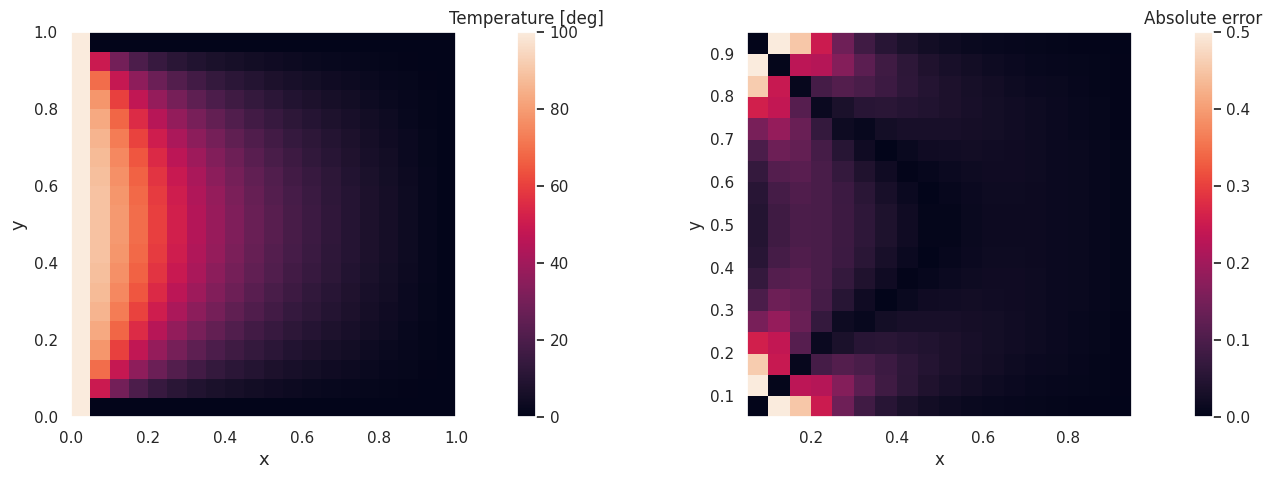

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

import scipy.sparse as sps

def sol_a(Im, h): # analytical solution
    u = 0 * Im[1::, 1::]
    xx, yy = np.meshgrid(np.arange(0,u.shape[0]), np.arange(0,u.shape[1]))
    xx = xx * h; yy = yy * h; L = u.shape[0] * h
    for n in range(1, 80):
        Bn = 100 * 2 / n / np.pi / np.sinh(-n * np.pi) * (1 - np.cos(n * np.pi))
        u += Bn * np.sinh(n * np.pi * (xx - L) / L) * np.sin(n * np.pi * yy / L)
    u = u[1::, 1::]
    return u

L, h = 1, 0.05
nps = int(np.ceil(L/h)) # size of the solution array
I = np.zeros((nps,nps)) # solution array (including BCs)
I[:, 0] = 100 # impose BCs

# Compute system of equations
A = matrix_A_d(I)
b = vector_b_d(I)

y = sps.linalg.spsolve(A, b) # solve system of equations
ya = sol_a(I, h) # analytical solution on nodes

# Plot
sx, sy = I.shape
y = np.reshape(y, (sx-2,sy-2), order='F'); I[1:-1, 1:-1] = y # put the solution back in the 2D array I
xx, yy = np.meshgrid(np.linspace(0,L,sx+1), np.linspace(0,L,sy+1))
plt.figure(figsize=(16,5))

plt.subplot(1, 2, 1)
plt.pcolormesh(xx, yy, I, vmin=0, vmax=100)
clb = plt.colorbar(); clb.ax.set_title('Temperature [deg]');
plt.xlabel('x', fontsize=13); plt.ylabel('y', fontsize=13); plt.axis('image')

plt.subplot(1, 2, 2)
plt.pcolor(xx[1:-1,1:-1], yy[1:-1,1:-1], np.abs(y-ya), vmin=0, vmax=.5)
clb2 = plt.colorbar(); clb2.ax.set_title('Absolute error');
plt.xlabel('x', fontsize=12); plt.ylabel('y', fontsize=12); plt.axis('image');

Note that the error is plotted only in the interior of the domain (since it is zero on the boundaries).

---

## Dealing with Neumann BCs

Now, we assume that, in some part of the boundary, we are not given the solution to the BVP, but we know the value of the differential of the solution in a particular direction instead. This means that we may have different BCs throughout the boundary, e.g., Dirichlet BCs on $\partial \Omega_0$ and Neumann BCs on $\partial \Omega_1$, with $\partial \Omega=\partial \Omega_0 \cup \partial \Omega_1$. Since we do not know the solution on $\partial \Omega_1$, we need to discretise the equation on the nodes belonging to it, leading to more equations (and unknowns!). As in the 1D case, we will need to discretise the BCs to find the solution to the problem. Let's explore the idea with an example.

**Example.** Consider the same exercise from the motivation, with the only difference that we are not given the temperature on the right hand side of the square, but something about its differential instead. More explicitly, now we know that

$$\nabla T (x,y) \cdot \mathbf{n} =0,$$

with $(x,y)$ on the right hand side of the square, and $\mathbf{n}$ is the vector normal to that side pointing outwards. In other words, $T_x(x,y)=0$ for $(x,y)$ on the right hand side of the square. Since the equation is the same, the stencil will be the same. However, we have now more unknowns than before.

Consider first the example with $h_x=h_y=h=L/3$. The new discretisation for this case is then

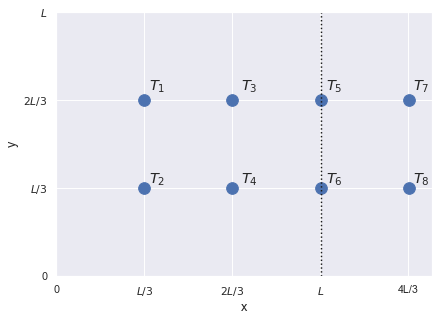

Using the stencil on all nodes within the domain (i.e., wherever the PDE is valid), we find the following set of equations:

\begin{align*}
&-4T_1+T_2+T_3+100=0,\\
&-4T_2+T_1+T_4+100=0,\\
&-4T_3+T_1+T_4+T_5=0,\\
&-4T_4+T_2+T_3+T_6=0,\\
&-4T_5+T_3+T_6+T_7=0,\\
&-4T_6+T_4+T_5+T_8=0.
\end{align*}

We can easily see that we have 8 unknowns ($T_i$, $i=1,...,8$) but only 6 equations. To overcome this problem, we discretise the BCs, as we did in the 1D case. This generates the following _extra_ equations

\begin{align*}
&(T_7-T_3)/(2h)=0,\\
&(T_8-T_4)/(2h)=0.
\end{align*}

Of course, we can write them altogether in matrix form, leading to

\begin{align*}
\begin{bmatrix}
-4 & 1 & 1&0 & 0& 0&0&0\\
1 & -4 & 0&1& 0& 0&0&0\\
1 & 0 & -4&1&1&0&0&0\\
0 & 1 & 1&-4&0&1&0&0\\
0&0 & 1 & 0&-4&1&1&0\\
0 &0&0& 1 & 1&-4&0&1\\
0&0&-1&0&0&0&1&0\\
0&0&0&-1&0&0&0&1
\end{bmatrix}\begin{bmatrix}
T_1\\T_2\\T_3\\T_4 \\T_5 \\ T_6 \\ T_7 \\ T_8
\end{bmatrix}=\begin{bmatrix}
-100\\-100\\0\\0\\0\\0\\0\\0
\end{bmatrix}.
\end{align*}


The solution to the system is $T_1=T_2=38.89$, $T_3=T_4=16.67$, $T_5=T_6=11.11$. Note that, in this case, we may have been able to simplify the problem by noting that, since the differential in the $x$ direction is zero on the right hand side of the domain, $T_3=T_7$ and $T_4=T_8$ (why?).

---

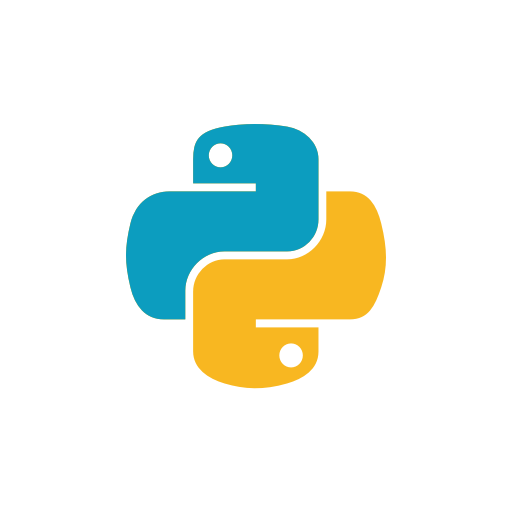

As before, we will require a Python implementation for refining the solution, which results being simpler than usual.

In [3]:
def matrix_A_n(Im): # one side only
    sx, sy = np.shape(Im[1:-1,1::]) # size of the interior domain
    n = sx * sy # number of unknowns
    d0 = -4 * np.ones(n)
    d1 = np.ones(n-1); d1[sx-1::sx] = 0
    ds = np.ones(n-sx);
    ds2 = np.ones(n-sx); ds2[-sx::] = 2
    A = sps.diags([d0,d1,d1,ds,ds2], [0,1,-1,sx,-sx], format='csc')
    return A

def vector_b_n(Im):
    sx, sy = np.shape(Im[1:-1,1::]) # size of the interior domain
    b = np.zeros(sx*sy)
    b[0:sx] = -Im[1:-1, 0]
    b[-sx::] = -Im[1:-1, -1]
    b[0::sx] = b[0::sx] - Im[0,1::]
    b[sx-1::sx] = b[sx-1::sx] - Im[-1, 1::]
    return b

Now, back to the motivation...

**Example.** We now solve the problem with Python:

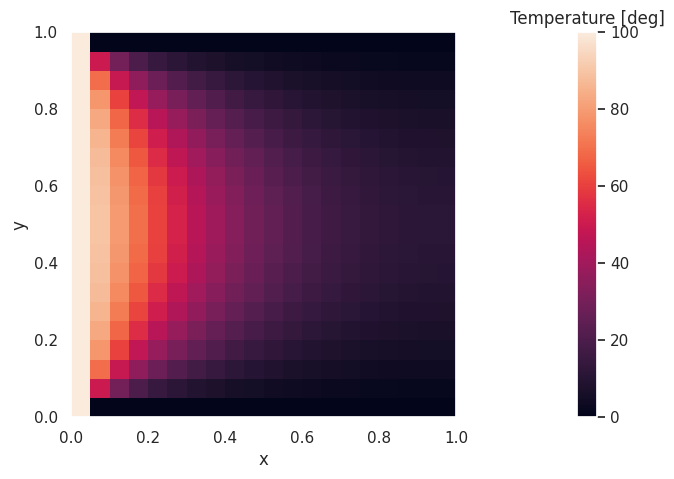

In [4]:
I2 = np.copy(I)

# Compute system of equations
A = matrix_A_n(I2)
b = vector_b_n(I2)

y = sps.linalg.spsolve(A, b) # solve system of equations
I2[1:-1, 1::] = np.reshape(y, (sx-2,sy-1), order='F')

# Plot
plt.figure(figsize=(9,5))
plt.pcolormesh(xx, yy, I2, vmin=0, vmax=100);
clb = plt.colorbar(); clb.ax.set_title('Temperature [deg]');
plt.xlabel('x', fontsize=12); plt.ylabel('y', fontsize=12); plt.axis('image');

It seems very similar to that found with Dirichlet BCs! However, we can check that the one with Neumann BCs has zero flux through the right hand side of the square, whereas the other has not. This can be done with the function ```streamplot``` available within the ```matplotlib``` library, as well as the function ```im_grad``` introduced in Lab 1:

In [5]:
def im_grad(Im):
    grad_x = (Im[2::,1:-1] - Im[0:-2, 1:-1]) / 2
    grad_y = (Im[1:-1, 2::] - Im[1:-1, 0:-2]) / 2
    return grad_x, grad_y

# Gradient for Dirichlet solution
g_x, g_y = im_grad(I)
Mag = np.sqrt(g_x**2+g_y**2);
Mag = np.log10(Mag); Mag[Mag<0] = 0; Mag[Mag>1] = 1

# Gradient for Neumann solution
g_x2, g_y2 = im_grad(I2)
Mag2 = np.sqrt(g_x2**2+g_y2**2)
Mag2 = np.log10(Mag2); Mag2[Mag2<0] = 0; Mag2[Mag2>1] = 1

x = np.arange(1, I.shape[0]-1)
y = np.arange(1, I.shape[1]-1)

In [6]:
# Plot
sns.set_style("white")
plt.figure(figsize=(16,5),dpi=400)

plt.subplot(1, 2, 1)
plt.streamplot(x*h, y*h, g_y, g_x, 2, 1, Mag, cmap='coolwarm', arrowsize=0.001, norm=None)
clb = plt.colorbar(); clb.ax.set_title('Gradient magnitude \n (log scale)')
plt.xlabel('x', fontsize=12); plt.ylabel('y', fontsize=12); plt.axis('image');
plt.title('Dirichlet BC', fontsize=15); plt.xlim([2*h,L-2*h]); plt.ylim([2*h,L-2*h])

plt.subplot(1, 2, 2)
plt.streamplot(x*h, y*h, g_y2, g_x2, 2, 1, Mag2, cmap='coolwarm', arrowsize=0.001, norm=None)
clb = plt.colorbar(); clb.ax.set_title('Gradient magnitude \n (log scale)')
plt.xlabel('x', fontsize=12); plt.ylabel('y', fontsize=12); plt.axis('image');
plt.title('Neumann BC', fontsize=15); plt.xlim([2*h,L-2*h]); plt.ylim([2*h,L-2*h]);

Output hidden; open in https://colab.research.google.com to view.

Effectively, there is no flux in the $x$ direction if Neumann BCs are imposed.

---

## Learning points

* We introduced the FDM for solving Laplace and Poisson equations
* We adapted the method for Dirichlet and Neumann BCs.

## Further reading

* Burden, Faires, and Burden. "Numerical Analysis". Chapter 12. Available as reading material.
* Trefethen. "Finite Difference and Spectral Methods for Ordinary and Partial Differential Equations". Chapter 3. Available [here](https://people.maths.ox.ac.uk/trefethen/pdetext.html).